# 201984045 남기윤 프로그래밍3 데이터 분석


저는 대한민국의 1인가구에 대해서 분석을 해 보았습니다.

## 분석 순서
### 1) 우리나라에서 가장 1인 가구가 많은 지역순

### 2) 입력받은 지역의 남녀 비율 보기

### 3) 지역 2개를 입력 받아 연령대마다 어느 지역의 인구가 더 많은지

In [1]:
import pandas as pd
import numpy as np

csv파일을 열면 이상하게 년도가 위에 나와있고 아래에 있는 연령별 ... 값들이 컬럼이 되어야 하는데 일단 컬럼 이름부터 변경을 해줍니다

In [2]:
df = pd.read_csv('aaa.csv',encoding='cp949') #인덱스 행정구역별(시군구로 설정)
df

,행정구역별(시군구),연령별,2017,2017.1,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2
0,행정구역별(시군구),연령별,1인가구,남자,여자,1인가구,남자,여자,1인가구,남자,여자
1,전국,합계,5618677,2791849,2826828,5848594,2906320,2942274,6147516,3053733,3093783
2,전국,20세 미만,61058,29108,31950,58154,27623,30531,59415,28591,30824
3,전국,20~24,393503,183578,209925,402476,183145,219331,431750,194984,236766
4,전국,25~29,568288,333886,234402,617468,359636,257832,685831,391896,293935
...,...,...,...,...,...,...,...,...,...,...,...
332,제주특별자치도,65~69,3996,1656,2340,4209,1770,2439,4584,1995,2589
333,제주특별자치도,70~74,3289,1087,2202,3549,1192,2357,3757,1298,2459
334,제주특별자치도,75~79,3351,828,2523,3348,830,2518,3373,812,2561
335,제주특별자치도,80~84,2605,472,2133,2662,521,2141,2684,540,2144


In [3]:
df.rename(columns={
    '행정구역별(시군구)':"area",
    '연령별':'age',
    '2017':'all_2017',
    '2017.1':'man_2017',
    '2017.2':'girl_2017',
    '2018':'all_2018',
    '2018.1':'man_2018',
    '2018.2':'girl_2018',
    '2019':'all_2019',
    '2019.1':'man_2019',
    '2019.2':'girl_2019'
    },
    inplace=True)

바로 아래 보이는 데이터 값 삭제 해줍니다 .. 
index에 보이는 행정구역별시군구를 삭제 해주면 아래의 행이 사라진 것을 볼 수 있습니다. 

In [4]:
df = df[df['age']!="합계"]
df = df[df['age']!="연령별"]

In [5]:
df

,area,age,all_2017,man_2017,girl_2017,all_2018,man_2018,girl_2018,all_2019,man_2019,girl_2019
2,전국,20세 미만,61058,29108,31950,58154,27623,30531,59415,28591,30824
3,전국,20~24,393503,183578,209925,402476,183145,219331,431750,194984,236766
4,전국,25~29,568288,333886,234402,617468,359636,257832,685831,391896,293935
5,전국,30~34,516827,330699,186128,522405,333818,188587,554883,354068,200815
6,전국,35~39,451634,290387,161247,470332,303224,167108,480733,309622,171111
...,...,...,...,...,...,...,...,...,...,...,...
332,제주특별자치도,65~69,3996,1656,2340,4209,1770,2439,4584,1995,2589
333,제주특별자치도,70~74,3289,1087,2202,3549,1192,2357,3757,1298,2459
334,제주특별자치도,75~79,3351,828,2523,3348,830,2518,3373,812,2561
335,제주특별자치도,80~84,2605,472,2133,2662,521,2141,2684,540,2144


info를 해서 확인을 해봅니다.
nan값이 없다는 걸 볼 수 있습니다.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 2 to 336
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area       315 non-null    object
 1   age        315 non-null    object
 2   all_2017   315 non-null    object
 3   man_2017   315 non-null    object
 4   girl_2017  315 non-null    object
 5   all_2018   315 non-null    object
 6   man_2018   315 non-null    object
 7   girl_2018  315 non-null    object
 8   all_2019   315 non-null    object
 9   man_2019   315 non-null    object
 10  girl_2019  315 non-null    object
dtypes: object(11)
memory usage: 29.5+ KB


#### info를 해줬더니 아래의 2017년~19년도까지 데이터가 숫자로 표기 되어야 하는데 오브젝트로 표기 됩니다.
이 부분을 바꿔 봅니다.

전에 위의 데이터 프레임에서 용량도 줄여줄 겸 object,int 32 정보를 확인하고 
범위 수에 맞으므로 category,int32로 바꿔도 될 것 같습니다.

In [7]:
np.iinfo('int32')

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [8]:
df=df.astype({
    'all_2017':np.int32,
    'man_2017':np.int32,
    'girl_2017':np.int32,
     'all_2018':np.int32,
    'man_2018':np.int32,
      'girl_2018':np.int32,
    'all_2019':np.int32,
     'man_2019' :np.int32,
      'girl_2019':np.int32
              }
)
              

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 2 to 336
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area       315 non-null    object
 1   age        315 non-null    object
 2   all_2017   315 non-null    int32 
 3   man_2017   315 non-null    int32 
 4   girl_2017  315 non-null    int32 
 5   all_2018   315 non-null    int32 
 6   man_2018   315 non-null    int32 
 7   girl_2018  315 non-null    int32 
 8   all_2019   315 non-null    int32 
 9   man_2019   315 non-null    int32 
 10  girl_2019  315 non-null    int32 
dtypes: int32(9), object(2)
memory usage: 18.5+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
all_2017,315.0,53511.209524,103954.073088,450.0,10359.5,18504.0,33478.5,568288.0
man_2017,315.0,26589.038095,57430.202077,93.0,3339.5,8976.0,16705.0,333886.0
girl_2017,315.0,26922.171429,50718.101658,234.0,4738.0,8704.0,18724.5,258840.0
all_2018,315.0,55700.895238,108330.163619,417.0,10719.5,19404.0,35659.5,617468.0
man_2018,315.0,27679.238095,59573.621639,90.0,3510.0,9473.0,17093.5,359636.0
girl_2018,315.0,28021.657143,53025.073947,197.0,5079.0,9353.0,19159.5,269195.0
all_2019,315.0,58547.771429,114523.106200,449.0,11377.5,20047.0,36749.0,685831.0
man_2019,315.0,29083.171429,62649.683355,109.0,3687.5,9546.0,17801.0,391896.0
girl_2019,315.0,29464.600000,56165.001355,237.0,5253.0,9532.0,19602.0,293935.0


2017년 데이터 사용

In [11]:
year2017=df.iloc[:,[0,1,3,4]]
year2017

,area,age,man_2017,girl_2017
2,전국,20세 미만,29108,31950
3,전국,20~24,183578,209925
4,전국,25~29,333886,234402
5,전국,30~34,330699,186128
6,전국,35~39,290387,161247
...,...,...,...,...
332,제주특별자치도,65~69,1656,2340
333,제주특별자치도,70~74,1087,2202
334,제주특별자치도,75~79,828,2523
335,제주특별자치도,80~84,472,2133


각 지역들 마다 1인가구가 어느 곳이 제일 많고, 적고를 보여준다.

In [12]:
year2017["sum"]=np.sum(year2017, axis=1)#mangirl의 맨 끝에 ㅊ합계를 추가하는데 axis = 1  행 우선 계산입니다.

allarea=(
year2017[['area','man_2017','girl_2017','sum']]
          .sort_values(['sum'], ascending=[False])
          .drop_duplicates(subset=['area'])     
)
allarea

C:\Users\kiyun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area,man_2017,girl_2017,sum
4,전국,333886,234402,568288
52,동부,286747,215026,501773
68,서울특별시,90451,89117,179568
197,경기도,78615,35775,114390
46,면부,16897,66344,83241
26,읍부,27226,23048,50274
91,부산광역시,16180,23176,39356
314,경상남도,19601,18736,38337
298,경상북도,16827,15756,32583
122,인천광역시,14744,13219,27963


분석 방해되는 데이터 삭제하기

In [13]:
year2017 = year2017[year2017['area']!="전국"]
year2017 = year2017[year2017['area']!="읍부"]
year2017 = year2017[year2017['area']!="면부"]
year2017 = year2017[year2017['area']!="동부"]

중복되는 값 없애주고 지역별로 남자, 여자 가장많은 곳과 가장 적은 곳 출력해보기

In [14]:

allarea=(
year2017[['area','man_2017','girl_2017','sum']]
          .sort_values(['sum'], ascending=[False])
          .drop_duplicates(subset=['area'])     
)
allarea

,area,man_2017,girl_2017,sum
68,서울특별시,90451,89117,179568
197,경기도,78615,35775,114390
91,부산광역시,16180,23176,39356
314,경상남도,19601,18736,38337
298,경상북도,16827,15756,32583
122,인천광역시,14744,13219,27963
147,대전광역시,12859,13653,26512
286,전라남도,4929,21485,26414
106,대구광역시,11943,13877,25820
244,충청남도,15952,8505,24457


In [15]:
year_2017=year2017.set_index('area') #인덱스를 설정해주지 않으면 입력 받은 값을 검색을 못 합니다.

In [16]:
#1인가구 분포율 궁금한 지역 입력
name = input('1인가구 분포율 어느 지역이 궁금하십니까?ex)경기도')#지역 이름 입력받는다.
a=year_2017.index.str.contains(name)#행을 찾아 해당 지역 인구를 a라는 변수에 저장
enter=year_2017[a] #a라는 값을 enter 에 다시 저장합니다.

enter #name 지역의 값을 표시합니다.

1인가구 분포율 어느 지역이 궁금하십니까?ex)경기도 경기도


,age,man_2017,girl_2017,sum
area,,,,
경기도,20세 미만,3315,4011,7326
경기도,20~24,25665,27966,53631
경기도,25~29,69845,40850,110695
경기도,30~34,78615,35775,114390
경기도,35~39,72706,35247,107953
경기도,40~44,66084,33791,99875
경기도,45~49,68991,39501,108492
경기도,50~54,60049,38654,98703
경기도,55~59,57788,50381,108169


In [17]:
mangirl_2017=enter.iloc[:,[0,1,2]]# [:,[0,1,2]]는 중간의 콤마에서 앞에는 행 뒤는 열입니다 따라서, 0,1,2는 연령별 , 여자,남자만 출력합니다.
#mangirl_2017=mangirl_2017.reset_index()
mangirl_2017=mangirl_2017.set_index('age') # 표를 그래프로 나타내야 하기 때문에 바꿉니다. 인덱스를 연령별로
mangirl_2017

,man_2017,girl_2017
age,,
20세 미만,3315,4011
20~24,25665,27966
25~29,69845,40850
30~34,78615,35775
35~39,72706,35247
40~44,66084,33791
45~49,68991,39501
50~54,60049,38654
55~59,57788,50381


In C:\Users\kiyun\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kiyun\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kiyun\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\kiyun\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kiyun\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

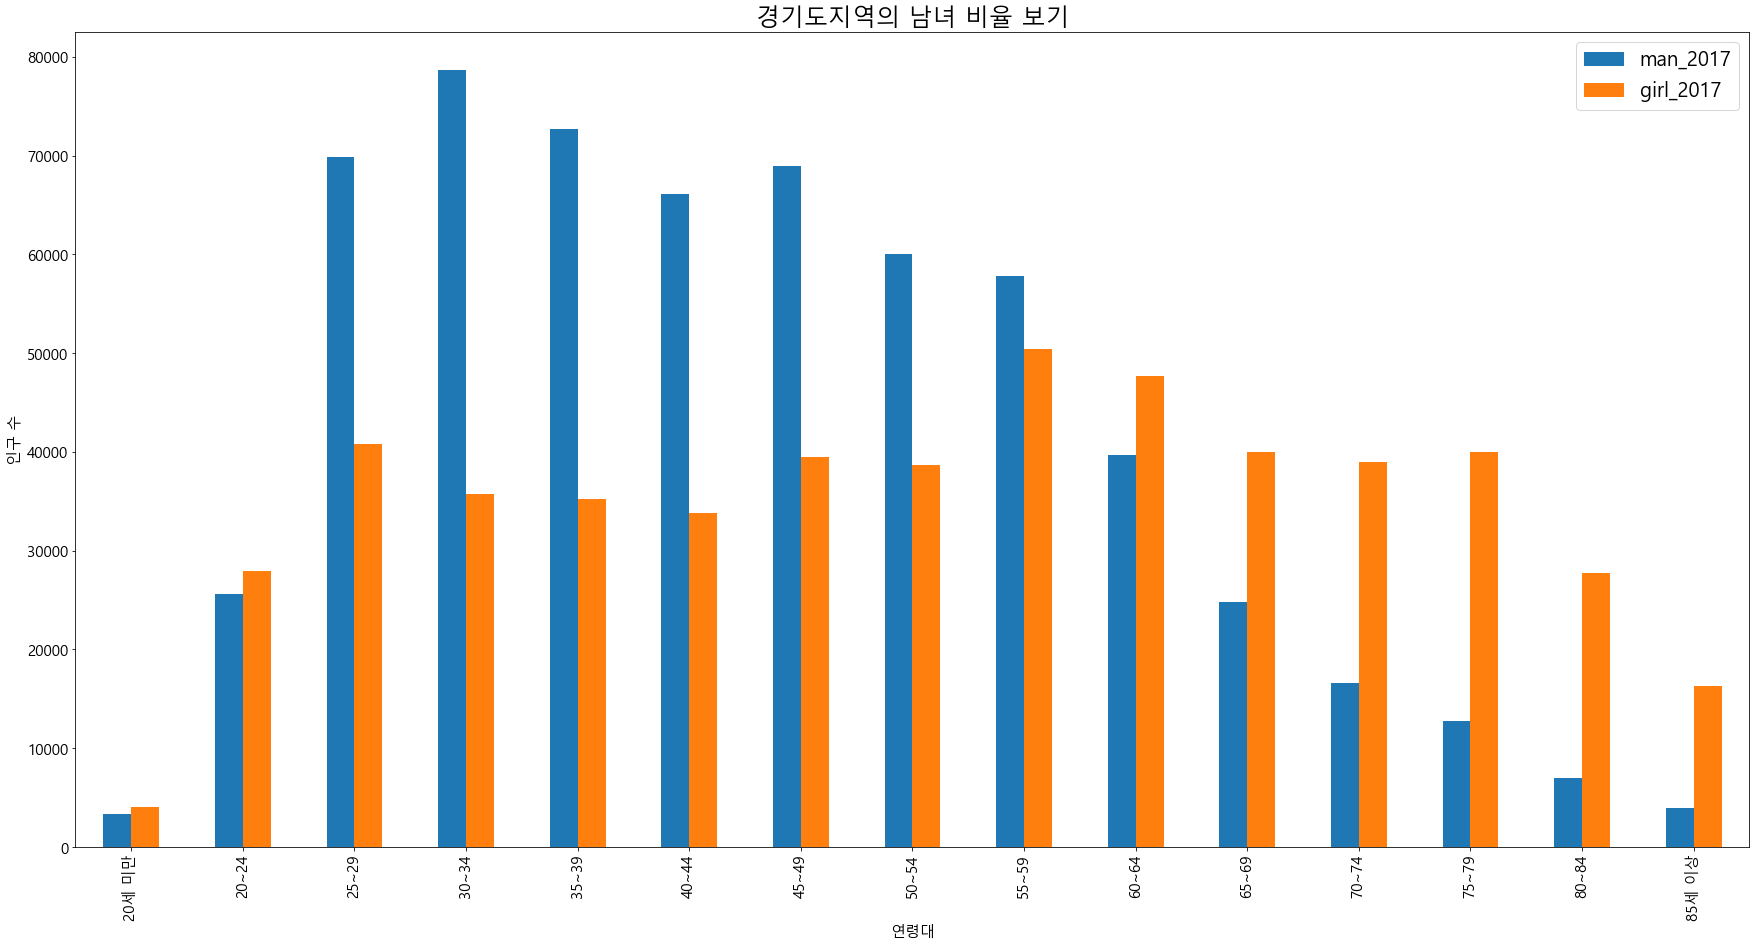

In [18]:
import matplotlib.pyplot as plt #표 출력하기 위해 임포트 해줍니다

plt.rc('font', family="Malgun Gothic",size='20')#이 부분을 안 적어주면 글씨가 깨지는 현상 발생.
mangirl_2017.plot(kind='bar',fontsize="15",figsize=(30,15),title=name+'지역의 남녀 비율 보기')# 꺾은선 그래프로 출력합니다

plt.xlabel('연령대',fontsize="15")#아래 x축 제목 표시
plt.ylabel('인구 수',fontsize="15")#아래 y축 제목 표시

plt.show()


In [19]:
name2 = input(name+'지역과 비교하기 ex)서울특별시')#지역 이름 입력받는다.
a2=year_2017.index.str.contains(name2)#행을 찾아 해당 지역 인구를 a라는 변수에 저장
enter2=year_2017[a2] #a라는 값을 enter 에 다시 저장합니다.
enter2

경기도지역과 비교하기 ex)서울특별시 서울특별시


,age,man_2017,girl_2017,sum
area,,,,
서울특별시,20세 미만,5769,8421,14190
서울특별시,20~24,38633,64818,103451
서울특별시,25~29,90451,89117,179568
서울특별시,30~34,85828,66969,152797
서울특별시,35~39,63595,49350,112945
서울특별시,40~44,50156,37384,87540
서울특별시,45~49,51922,35575,87497
서울특별시,50~54,43351,30629,73980
서울특별시,55~59,42590,40882,83472


밑에는 경기도지역의 합계를 구해서 서울 특별시랑 비교를 해보려고 한다.

In [20]:
mangirl2_2017=enter2.iloc[:,[0,1,2]]# [:,[0,1,2]]는 중간의 콤마에서 앞에는 행 뒤는 열입니다 따라서, 0,2,3는 연령별 , 여자,남자만 출력합니다.
#mangirl_2017=mangirl_2017.reset_index()
mangirl2_2017=mangirl2_2017.set_index('age') # 표를 그래프로 나타내야 하기 때문에 바꿉니다. 인덱스를 연령별로
mangirl2_2017 

,man_2017,girl_2017
age,,
20세 미만,5769,8421
20~24,38633,64818
25~29,90451,89117
30~34,85828,66969
35~39,63595,49350
40~44,50156,37384
45~49,51922,35575
50~54,43351,30629
55~59,42590,40882


In [22]:

mangirl_2017["합계"]=np.sum(mangirl_2017, axis=1)#mangirl의 맨 끝에 ㅊ합계를 추가하는데 axis = 1  행 우선 계산입니다.

mangirl2_2017["합계2"]=np.sum(mangirl2_2017, axis=1)#mangirl의 맨 끝에 ㅊ합계를 추가하는데 axis = 1  행 우선 계산입니다.



concat을 사용해서 데이터들을 합쳐줍니다

In [23]:
frames=[mangirl_2017,mangirl2_2017]
result=pd.concat([mangirl_2017['합계'],mangirl2_2017['합계2']],axis=1)
result.rename(columns={
    '합계':name+" 지역", #입력받은 데이터로 출력이 됩니다.
    '합계2':name2+" 지역"
    },
    inplace=True)
result

,경기도 지역,서울특별시 지역
age,,
20세 미만,7326,14190
20~24,53631,103451
25~29,110695,179568
30~34,114390,152797
35~39,107953,112945
40~44,99875,87540
45~49,108492,87497
50~54,98703,73980
55~59,108169,83472


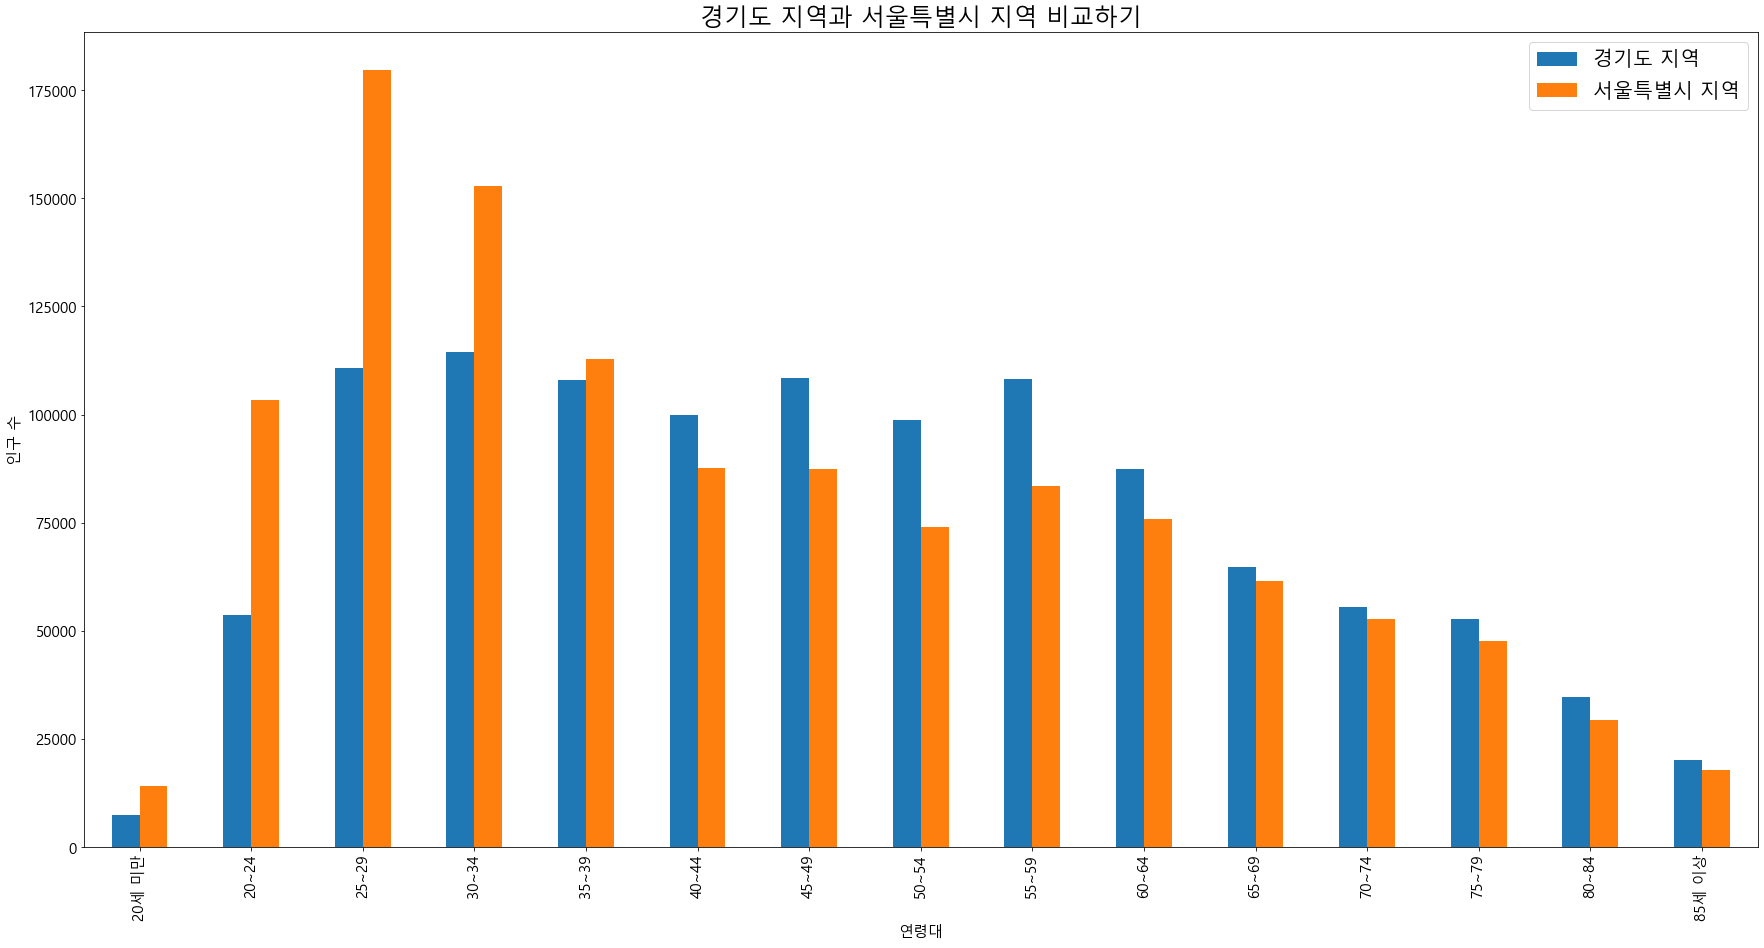

In [24]:
import matplotlib.pyplot as plt #표 출력하기 위해 임포트 해줍니다
plt.rc('font', family="Malgun Gothic",size='20')
result.plot(kind='bar',fontsize="15",figsize=(30,15),title=name+' 지역과 '+name2+' 지역 비교하기')
plt.xlabel('연령대',fontsize="15")#아래 x축 제목 표시
plt.ylabel('인구 수',fontsize="15")#아래 y축 제목 표시

plt.show()